# Exploratory Data Analysis for Capstone 3 - Diamond Price Data

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats

### Import Data Files

In [2]:
# File path locations & Read into Dataframe(s)

diamonds_clean = '../Data/diamonds_clean.csv'

diamonds_df = pd.read_csv(diamonds_clean)

### View Data

In [3]:
diamonds_df.sample(10)

carat        cut color clarity  depth  table     x     y     z  price
6736    0.31       Fair     E     SI1   56.9   66.0  4.53  4.47  2.56    579
30516   0.40       Good     J     VS1   64.0   56.0  4.69  4.66  2.99    734
3045    0.27  Very Good     G    VVS1   61.0   56.0  4.21  4.25  2.57    566
1397    0.24      Ideal     G      IF   61.6   57.0  3.99  4.02  2.46    559
26581   1.74      Ideal     G     VS2   62.9   57.0  7.68  7.64  4.82  16316
12318   1.27  Very Good     J     SI1   60.9   59.0  6.96  7.04  4.26   5224
19555   1.13      Ideal     G    VVS2   60.7   57.0  6.74  6.81  4.11   8192
31304   0.32      Ideal     D     VS2   61.5   56.0  4.41  4.44  2.72    758
8509    1.01  Very Good     F     SI2   60.0   55.0  6.56  6.53  3.93   4425
32948   0.32    Premium     H     SI1   62.0   58.0  4.38  4.39  2.72    461

In [4]:
# Create price per carat column

diamonds_df['pricePerCarat'] = diamonds_df['price'] / diamonds_df['carat']

In [5]:
diamonds_df['carat_bins'] = pd.cut(x=diamonds_df['carat'], bins=[0, 0.49, 0.99, 1.49, 1.99, 2.49, 2.99, 9.99])
diamonds_df['carat_cats'] = pd.cut(x=diamonds_df['carat'], bins=[0, 0.49, 0.99, 1.49, 1.99, 2.49, 2.99, 9.99],\
                                   labels=['<0.49', '0.50-0.99', '1.00-1.49', '1.50-1.99', '2.00-2.49', '2.50-2.99', '3.00+'])



In [6]:
diamonds_df.sample(10)

carat      cut color clarity  depth  table     x     y     z  price  \
45637   0.25  Premium     E     VS2   59.7   61.0  4.10  4.08  2.44    525   
46441   0.54    Ideal     E     VS2   61.6   56.0  5.24  5.28  3.24   1774   
53472   0.75  Premium     F     SI1   61.5   58.0  5.83  5.87  3.60   2683   
24604   1.39    Ideal     G      IF   60.6   55.0  7.21  7.27  4.39  12943   
15831   1.01  Premium     G     VS1   61.2   58.0  6.47  6.33  3.92   6335   
15488   1.12    Ideal     G     VS2   62.1   57.0  6.60  6.63  4.11   6209   
50052   0.51  Premium     F     VS2   61.1   58.0  5.19  5.16  3.16   2203   
12139   1.00     Good     E     SI1   63.7   60.0  6.29  6.24  3.99   5174   
2780    0.90    Ideal     J     VS2   62.5   57.0  6.16  6.26  3.88   3255   
11889   1.06    Ideal     I     VS2   61.4   55.0  6.59  6.61  4.05   5116   

       pricePerCarat    carat_bins carat_cats  
45637    2100.000000   (0.0, 0.49]      <0.49  
46441    3285.185185  (0.49, 0.99]  0.50-0.99  
53472    3577.333333  (0.49, 0.99]  0.50-0.99  
24604    9311.510791  (0.99, 1.49]  1.00-1.49  
15831    6272.277228  (0.99, 1.49]  1.00-1.49  
15488    5543.750000  (0.99, 1.49]  1.00-1.49  
50052    4319.607843  (0.49, 0.99]  0.50-0.99  
12139    5174.000000  (0.99, 1.49]  1.00-1.49  
2780     3616.666667  (0.49, 0.99]  0.50-0.99  
11889    4826.415094  (0.99, 1.49]  1.00-1.49

In [7]:
diamonds_df['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [8]:
diamonds_category = diamonds_df.copy()

cleanup_categoricals = {'cut_vals':{'Fair':1,'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, \
                        'color_vals':{'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}, \
                        'clarity_vals':{'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}}

diamonds_category['cut_vals'] = diamonds_category['cut']
diamonds_category['color_vals'] = diamonds_category['color']
diamonds_category['clarity_vals'] = diamonds_category['clarity']

diamonds_category = diamonds_category.replace(cleanup_categoricals)
newcat_cols = ['cut_vals', 'color_vals', 'clarity_vals']

for col in newcat_cols:
    diamonds_category[col] = diamonds_category[col].apply(lambda x: int(x) if x == x else "")


diamonds_category.sample(10)

carat        cut color clarity  depth  table     x     y     z  price  \
38621   0.31      Ideal     H     VS2   61.9   55.0  4.35  4.38  2.70    489   
43446   0.53      Ideal     H     VS2   61.4   55.4  5.19  5.24  3.20   1417   
6998    1.00       Good     D     SI1   57.6   62.0  6.62  6.50  3.78   4155   
33732   0.31      Ideal     F    VVS1   62.0   54.0  4.37  4.41  2.72    840   
36956   0.38       Good     G     VS1   63.9   60.0  4.59  4.52  2.91    962   
38991   0.40      Ideal     E    VVS2   61.5   55.0  4.79  4.77  2.94   1056   
44840   0.51  Very Good     F     VS1   63.3   57.0  5.06  5.09  3.21   1627   
40114   0.41      Ideal     E     VS1   60.4   55.0  4.85  4.89  2.94   1115   
42020   0.51      Ideal     I     VS2   60.5   58.0  5.15  5.20  3.13   1268   
6014    0.90  Very Good     H     VS1   62.7   56.0  6.15  6.20  3.87   3964   

       pricePerCarat    carat_bins carat_cats  cut_vals  color_vals  \
38621    1577.419355   (0.0, 0.49]      <0.49         5           3   
43446    2673.584906  (0.49, 0.99]  0.50-0.99         5           3   
6998     4155.000000  (0.99, 1.49]  1.00-1.49         2           7   
33732    2709.677419   (0.0, 0.49]      <0.49         5           5   
36956    2531.578947   (0.0, 0.49]      <0.49         2           4   
38991    2640.000000   (0.0, 0.49]      <0.49         5           6   
44840    3190.196078  (0.49, 0.99]  0.50-0.99         3           5   
40114    2719.512195   (0.0, 0.49]      <0.49         5           6   
42020    2486.274510  (0.49, 0.99]  0.50-0.99         5           2   
6014     4404.444444  (0.49, 0.99]  0.50-0.99         3           3   

       clarity_vals  
38621             4  
43446             4  
6998              3  
33732             7  
36956             5  
38991             6  
44840             5  
40114             5  
42020             4  
6014              5

In [9]:
diamonds_df.describe()

carat         depth         table             x             y  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834      5.731627      5.734887   
std        0.473795      1.432331      2.234064      1.119423      1.140126   
min        0.200000     43.000000     43.000000      3.730000      3.680000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  pricePerCarat  
count  53920.000000  53920.000000   53920.000000  
mean       3.540046   3930.993231    4007.833685  
std        0.702530   3987.280446    2012.176020  
min        1.070000    326.000000    1051.162791  
25%        2.910000    949.000000    2477.666667  
50%        3.530000   2401.000000    3494.633257  
75%        4.040000   5323.250000    4949.019608  
max       31.800000  18823.000000   17828.846154

In [10]:
diamonds_category.describe()

carat         depth         table             x             y  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834      5.731627      5.734887   
std        0.473795      1.432331      2.234064      1.119423      1.140126   
min        0.200000     43.000000     43.000000      3.730000      3.680000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  pricePerCarat      cut_vals    color_vals  \
count  53920.000000  53920.000000   53920.000000  53920.000000  53920.000000   
mean       3.540046   3930.993231    4007.833685      3.904228      4.405972   
std        0.702530   3987.280446    2012.176020      1.116579      1.701272   
min        1.070000    326.000000    1051.162791      1.000000      1.000000   
25%        2.910000    949.000000    2477.666667      3.000000      3.000000   
50%        3.530000   2401.000000    3494.633257      4.000000      4.000000   
75%        4.040000   5323.250000    4949.019608      5.000000      6.000000   
max       31.800000  18823.000000   17828.846154      5.000000      7.000000   

       clarity_vals  
count  53920.000000  
mean       4.051502  
std        1.647005  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        5.000000  
max        8.000000

#### *Created a 'Price Per Carat' column as a means of observing which characteristics have the highest impact on price, allows for better isolation of the value of the diamond regardless of carat weight.*

#### *Created 'Carat Bins' to separate out the trends observed price at carat weight intervals.*

#### *Generated encoded columns for categorical variables 'cut', 'color', and 'clarity' to view correlation with numerical values more easily in a heatmap chart.*

### Exploratory Visualizations

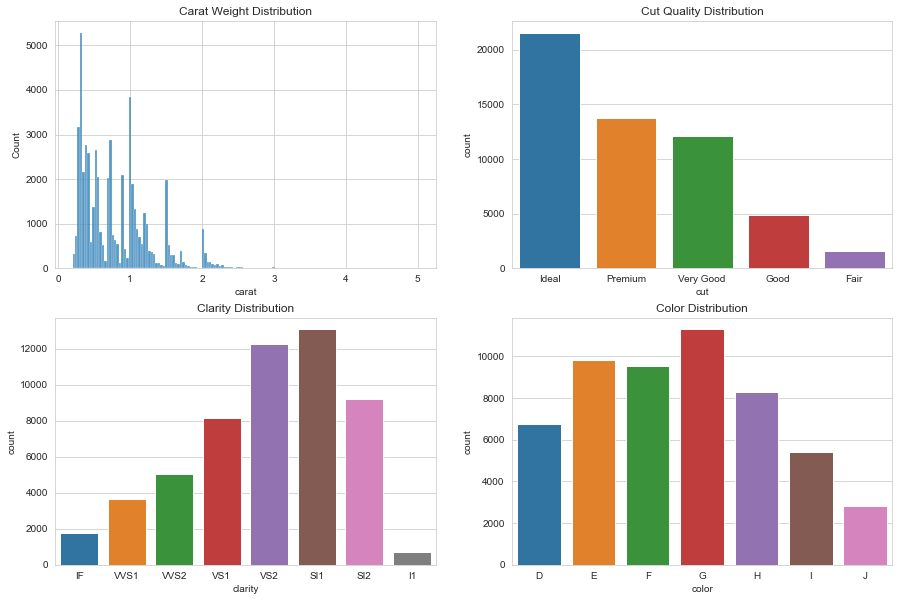

In [11]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

sns.histplot(diamonds_df['carat'], ax=ax[0,0])
sns.countplot(x='cut', data=diamonds_df, order=['Ideal','Premium','Very Good','Good','Fair'], ax=ax[0,1])
sns.countplot(x='clarity', data=diamonds_df, order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'], ax=ax[1,0])
sns.countplot(x='color', data=diamonds_df, order=['D','E','F','G','H','I','J'], ax=ax[1,1])

ax[0,0].set_title('Carat Weight Distribution')
ax[0,1].set_title('Cut Quality Distribution')
ax[1,0].set_title('Clarity Distribution')
ax[1,1].set_title('Color Distribution')

plt.tight_layout;

In [12]:
# Correlations

diam_corr = diamonds_category.drop(['color','cut', 'clarity'], axis=1)

dcorr = diam_corr.corr(method='spearman')
dcorr

carat     depth     table         x         y         z  \
carat          1.000000  0.030146  0.194941  0.996645  0.996033  0.994708   
depth          0.030146  1.000000 -0.245098 -0.023214 -0.025186  0.103568   
table          0.194941 -0.245098  1.000000  0.202294  0.195833  0.160294   
x              0.996645 -0.023214  0.202294  1.000000  0.997961  0.988378   
y              0.996033 -0.025186  0.195833  0.997961  1.000000  0.988141   
z              0.994708  0.103568  0.160294  0.988378  0.988141  1.000000   
price          0.962888  0.010013  0.171797  0.963754  0.963215  0.958593   
pricePerCarat  0.850440 -0.019897  0.124944  0.854125  0.854488  0.845692   
cut_vals      -0.138137 -0.199681 -0.475996 -0.124467 -0.125217 -0.147940   
color_vals    -0.249505 -0.049130 -0.028052 -0.245434 -0.245314 -0.251271   
clarity_vals  -0.374053 -0.074757 -0.161737 -0.370971 -0.365351 -0.374536   

                  price  pricePerCarat  cut_vals  color_vals  clarity_vals  
carat          0.962888       0.850440 -0.138137   -0.249505     -0.374053  
depth          0.010013      -0.019897 -0.199681   -0.049130     -0.074757  
table          0.171797       0.124944 -0.475996   -0.028052     -0.161737  
x              0.963754       0.854125 -0.124467   -0.245434     -0.370971  
y              0.963215       0.854488 -0.125217   -0.245314     -0.365351  
z              0.958593       0.845692 -0.147940   -0.251271     -0.374536  
price          1.000000       0.955749 -0.092942   -0.150012     -0.211466  
pricePerCarat  0.955749       1.000000 -0.022998   -0.033905     -0.021794  
cut_vals      -0.092942      -0.022998  1.000000    0.017157      0.186879  
color_vals    -0.150012      -0.033905  0.017157    1.000000     -0.030487  
clarity_vals  -0.211466      -0.021794  0.186879   -0.030487      1.000000

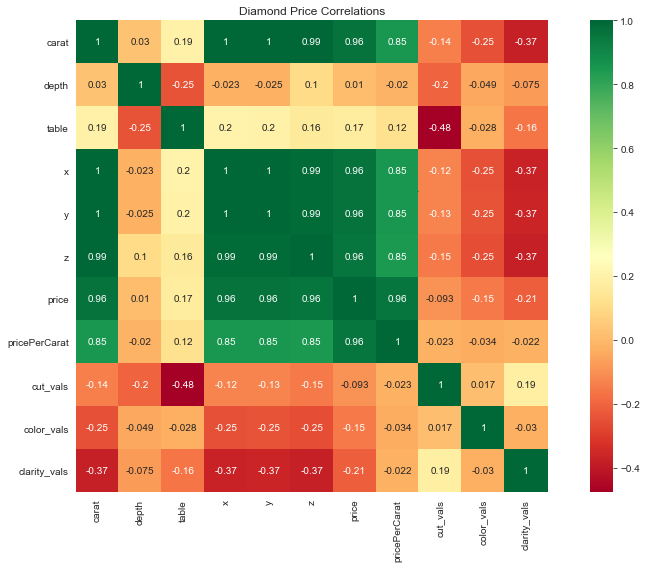

In [13]:
# Visualize these correlations

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(dcorr, cmap='RdYlGn', annot=True, square=True, ax=ax)

ax.set_title('Diamond Price Correlations')

plt.tight_layout()
plt.show()

#### *The correlation heatmap shows that carat weight, x, y, and z are positively correlated with price. Interestingly, each of these values are negatively correlated with clarity and color quality, suggesting that larger diamonds might have more varibility in color and clarity in order to cut them to the desired large size. The quality of the cut is negatively correlated with table percentage, suggesting that smaller table percentages are present in better cut diamonds. For price prediction, these are going to be the most important features to focus on.*

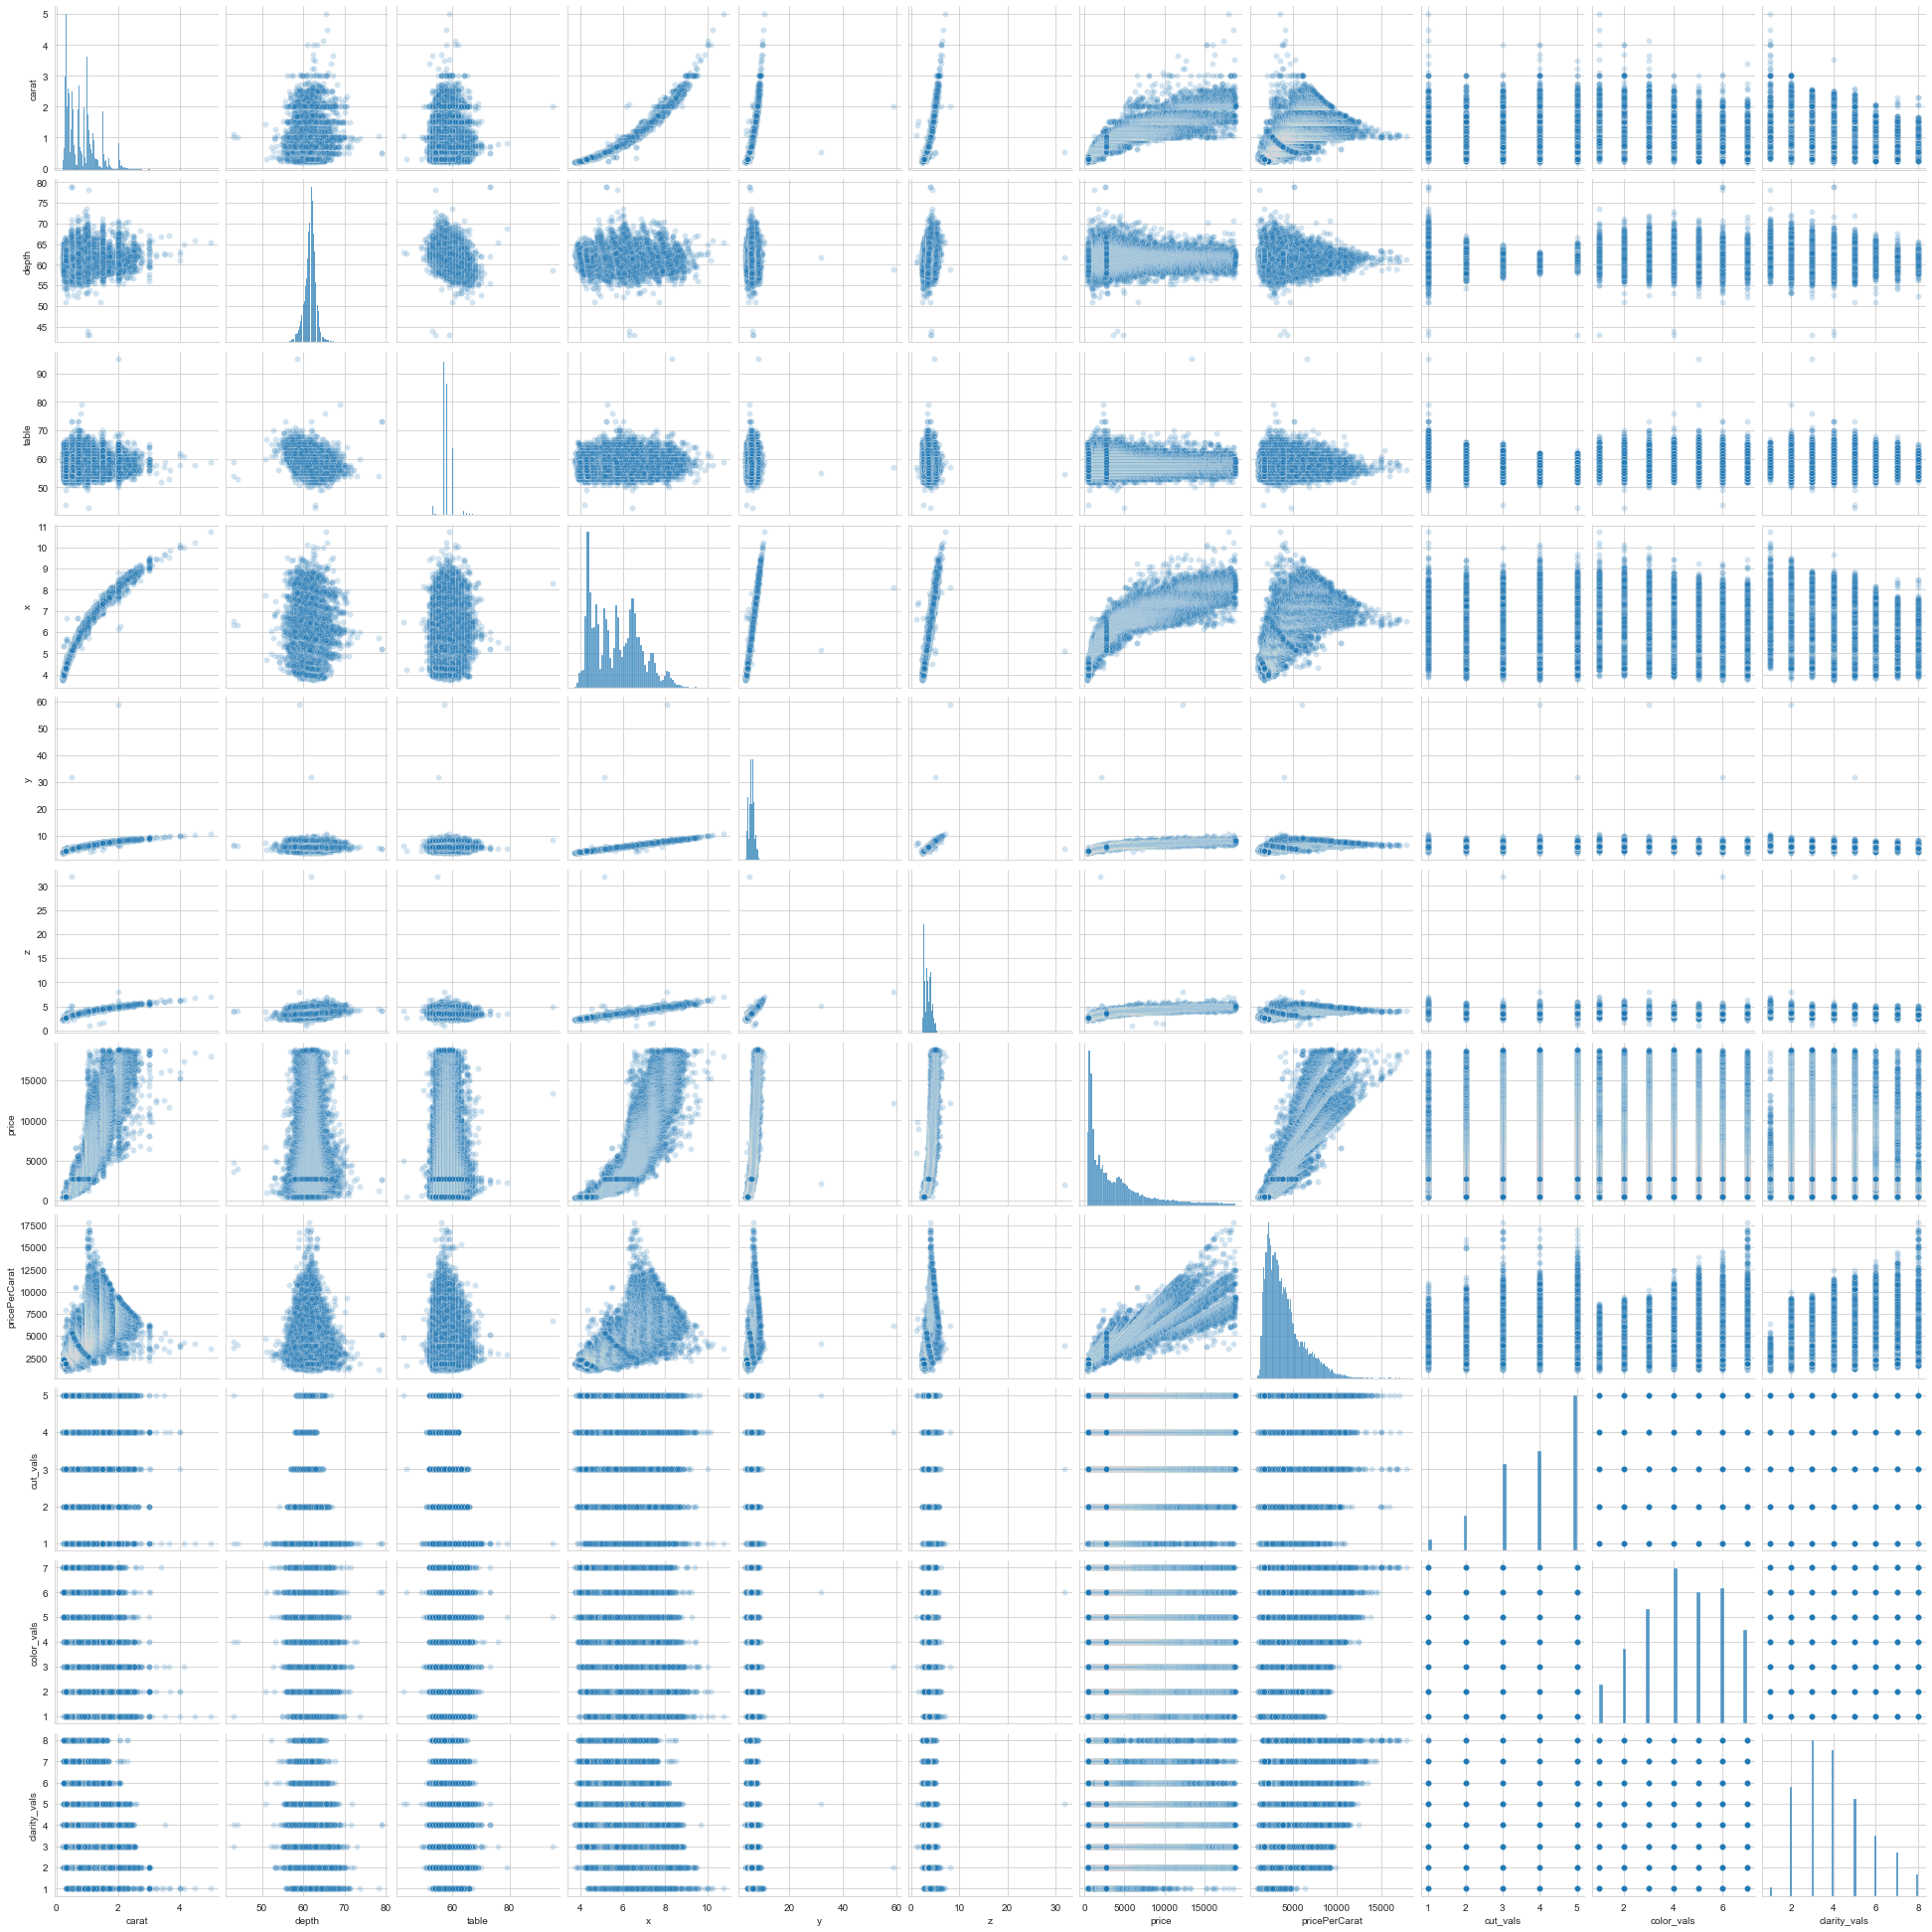

In [14]:
sns.pairplot(diam_corr, plot_kws={'alpha':0.2})

Text(0.5, 1.0, 'Carat (Binned) vs Price')

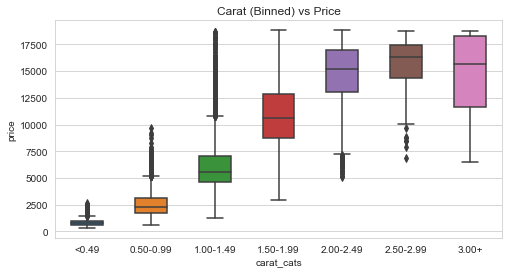

In [15]:

plt.figure(figsize=(8,4))

sns.boxplot(x='carat_cats', y='price', data=diamonds_df, width=0.5)

plt.title('Carat (Binned) vs Price')

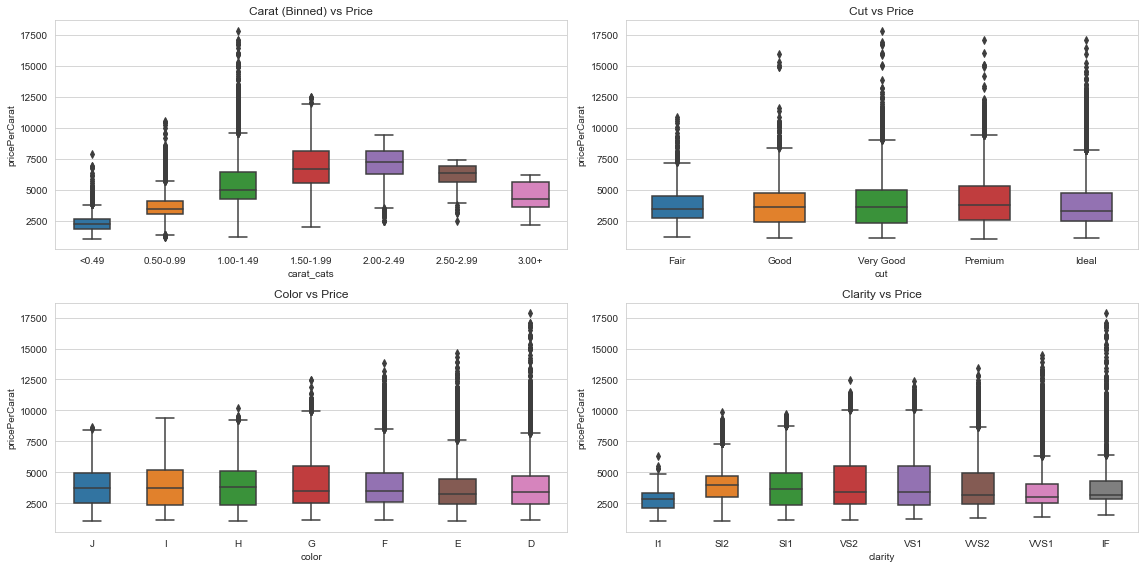

In [16]:

fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.boxplot(x='carat_cats', y='pricePerCarat', data=diamonds_df, width=0.5, ax=ax[0,0])
sns.boxplot(x='cut', y='pricePerCarat', order=['Fair','Good','Very Good','Premium','Ideal'], data=diamonds_df, width=0.5, ax=ax[0,1])
sns.boxplot(x='color', y='pricePerCarat', order=['J','I','H','G','F','E','D'], data=diamonds_df, width=0.5, ax=ax[1,0])
sns.boxplot(x='clarity', y='pricePerCarat', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=diamonds_df, width=0.5, ax=ax[1,1])

ax[0,0].set_title('Carat (Binned) vs Price')
ax[0,1].set_title('Cut vs Price')
ax[1,0].set_title('Color vs Price')
ax[1,1].set_title('Clarity vs Price')

plt.tight_layout()
plt.show()

#### *Carat bins less than 1.5 are skewed to lower price in mean price per carat, with outliers in the higher price per carat. The 1.50 - 1.99 bin is very symmetrically distributed around ~7,000 dollars per carat, but has a fairly wide spread relative to the highest and lowest bins. The larger carat bins have a mean skewed towards the higher price per carat values, but have a much lower spread in outliers than the lower carat size bins.*

#### *It is hard to make a deliberate statement about the price per carat reflected in the cut quality. Each cut category has a similar distribution in price per carat and outliers to the higher price per carat.*

#### *The mean price per carat based on diamond color is relatively consistent across all colors, however, the number of high-side outliers increases rather significantly with increasing color quality.*

#### *Similar to color, the price per carat based on clarity is between 2500 and 5000, with the number of high-side outliers increasing significantly with increasing clarity quality*

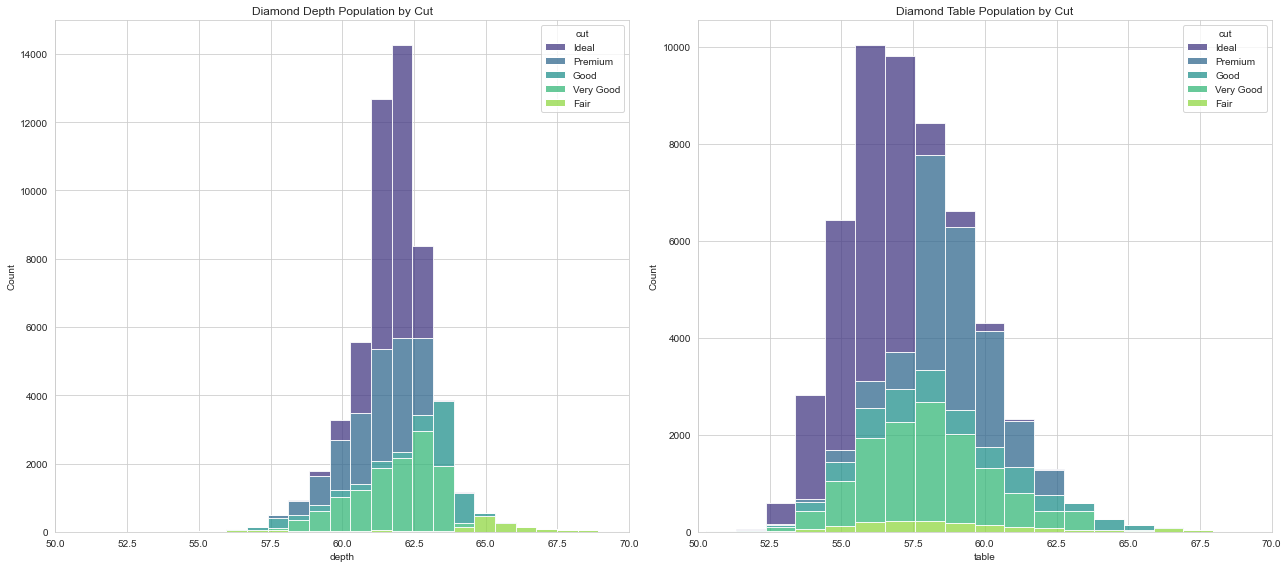

In [17]:

fig,ax = plt.subplots(1, 2, figsize=(18,8))

sns.histplot(x='depth', hue='cut', palette='viridis', bins=50, multiple='stack', data=diamonds_df, ax=ax[0])
sns.histplot(x='table', hue='cut', palette='viridis', bins=50, multiple='stack', data=diamonds_df, ax=ax[1])

ax[0].set_xlim(50, 70)
ax[1] = plt.xlim(50, 70)

ax[0].set_title('Diamond Depth Population by Cut')
ax[1] = plt.title('Diamond Table Population by Cut')



plt.tight_layout()
plt.show()

#### *The depth of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base. The depth of any diamond is expressed as a percentage. A diamond’s table is the flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above. There is an interesting trend here: the depth value has a very tight range around ~62%, with lower quality cuts having a slightly higher percentage and lower percentage for higher quality cuts. A similar tight range is present for the table percentage: 'Ideal' cut diamonds have a range between ~53% and ~57%, the 'Premium' is slightly higher, but the 'Good' covers the distribution of both, ranging from 53% to 62%.*

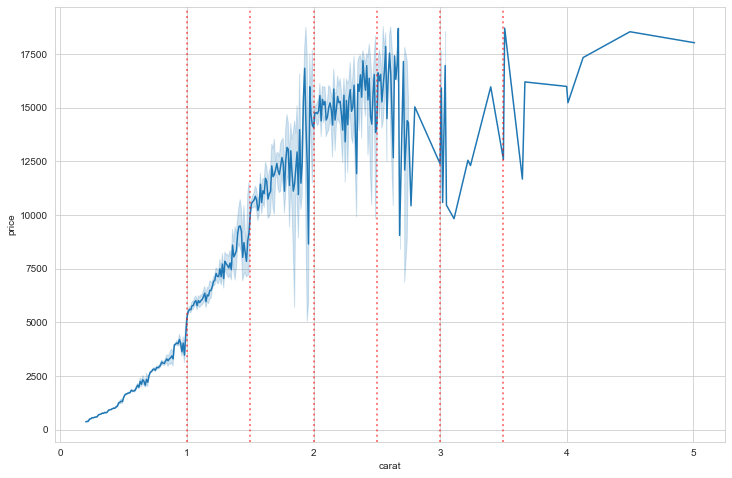

In [18]:

plt.figure(figsize=(12,8))

sns.lineplot(x='carat', y='price', data=diamonds_df, err_style='band', legend='auto')

xcoords = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
for xc in xcoords:
    plt.axvline(x=xc, linestyle='dotted', linewidth=2, color='r', alpha=0.5)

#### *There appear to be large jumps in price at 0.5 carat weight intervals, with small drops in price slightly below these carat weights. From a price prediction standpoint, this jump at the beginning of an interval and drop at the higher end of the interval represent possible sources of error in a regression model.*

<AxesSubplot:xlabel='carat', ylabel='price'>

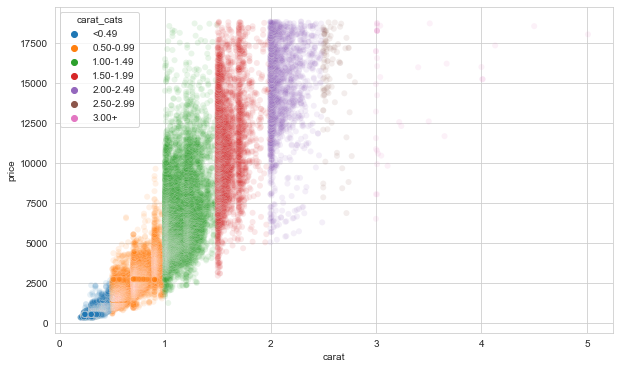

In [19]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='carat', y='price', hue='carat_cats', alpha=0.1, data=diamonds_df)

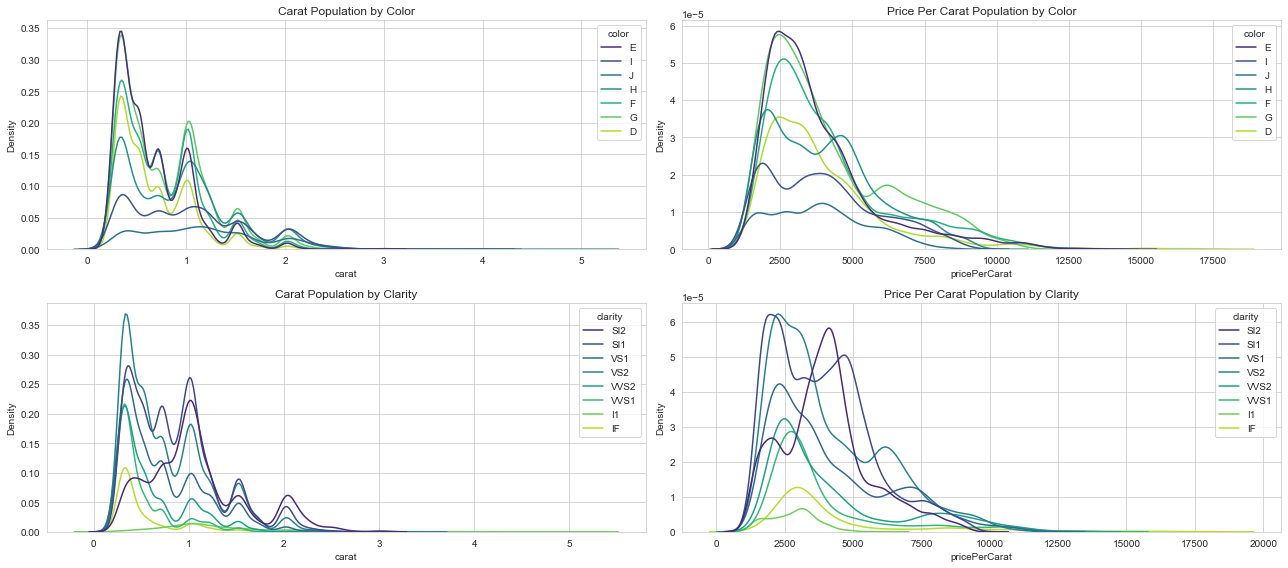

In [20]:

fig,ax = plt.subplots(2, 2, figsize=(18,8))

sns.kdeplot(x='carat', hue='color', palette='viridis', alpha=0.1, data=diamonds_df, ax=ax[0,0])
sns.kdeplot(x='pricePerCarat', hue='color', palette='viridis', alpha=0.1, data=diamonds_df, ax=ax[0,1])
sns.kdeplot(x='carat', hue='clarity', palette='viridis', alpha=0.1, data=diamonds_df, ax=ax[1,0])
sns.kdeplot(x='pricePerCarat', hue='clarity', palette='viridis', alpha=0.1, data=diamonds_df, ax=ax[1,1])

#ax[0] = plt.xlim(50, 75)
#ax[1] = plt.xlim(50, 70)

ax[0,0].set_title('Carat Population by Color')
ax[0,1].set_title('Price Per Carat Population by Color')
ax[1,0].set_title('Carat Population by Clarity')
ax[1,1].set_title('Price Per Carat Population by Clarity')

plt.tight_layout()
plt.show()

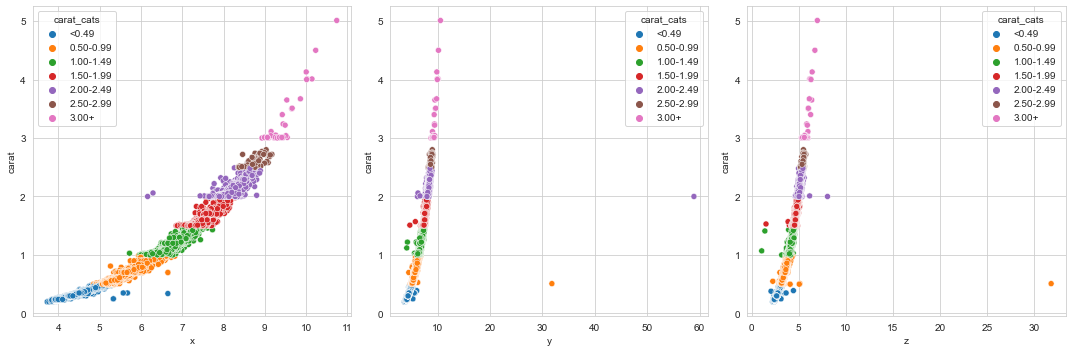

In [21]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(x='x', y='carat', hue='carat_cats', data=diamonds_df, ax=ax[0])
sns.scatterplot(x='y', y='carat', hue='carat_cats', data=diamonds_df, ax=ax[1])
sns.scatterplot(x='z', y='carat', hue='carat_cats', data=diamonds_df, ax=ax[2])

plt.tight_layout()
plt.show()

In [22]:
dimension_outliers = diamonds_df.loc[(diamonds_df['y'] > 30) | (diamonds_df['z'] > 30)]

dimension_outliers

carat        cut color clarity  depth  table     x      y      z  \
24058   2.00    Premium     H     SI2   58.9   57.0  8.09  58.90   8.06   
48393   0.51  Very Good     E     VS1   61.8   54.7  5.12   5.15  31.80   
49172   0.51      Ideal     E     VS1   61.8   55.0  5.15  31.80   5.12   

       price  pricePerCarat    carat_bins carat_cats  
24058  12210    6105.000000  (1.99, 2.49]  2.00-2.49  
48393   1970    3862.745098  (0.49, 0.99]  0.50-0.99  
49172   2075    4068.627451  (0.49, 0.99]  0.50-0.99

In [23]:
diamonds_clean = diamonds_category.drop(dimension_outliers.index)

diamonds_clean.shape, diamonds_category.shape

((53917, 16), (53920, 16))

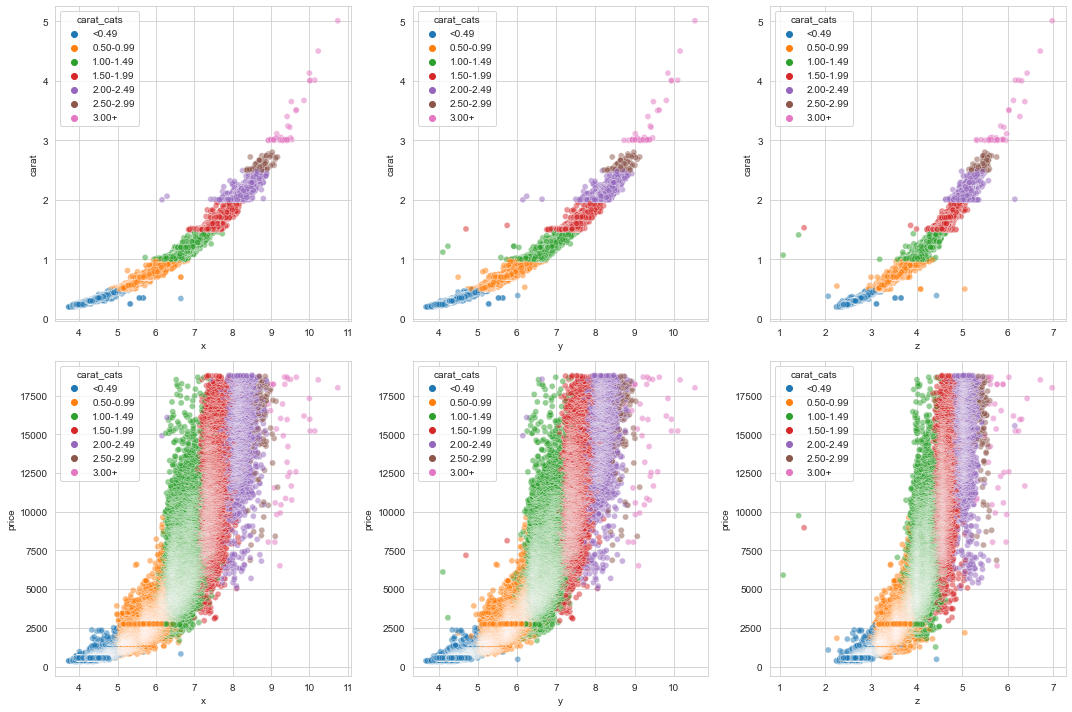

In [24]:
fig,ax = plt.subplots(2,3,figsize=(15,10))

sns.scatterplot(x='x', y='carat', hue='carat_cats', alpha=0.5, data=diamonds_clean, ax=ax[0,0])
sns.scatterplot(x='y', y='carat', hue='carat_cats', alpha=0.5, data=diamonds_clean, ax=ax[0,1])
sns.scatterplot(x='z', y='carat', hue='carat_cats', alpha=0.5, data=diamonds_clean, ax=ax[0,2])

sns.scatterplot(x='x', y='price', hue='carat_cats', alpha=0.5, data=diamonds_clean, ax=ax[1,0])
sns.scatterplot(x='y', y='price', hue='carat_cats', alpha=0.5, data=diamonds_clean, ax=ax[1,1])
sns.scatterplot(x='z', y='price', hue='carat_cats', alpha=0.5, data=diamonds_clean, ax=ax[1,2])

plt.tight_layout()
plt.show()

In [25]:
# Updated Correlations

diam_corr2 = diamonds_clean.drop(['color','cut', 'clarity'], axis=1)

dcorr2 = diam_corr2.corr(method='spearman')
dcorr2

carat     depth     table         x         y         z  \
carat          1.000000  0.030196  0.194933  0.996644  0.996078  0.994797   
depth          0.030196  1.000000 -0.245120 -0.023167 -0.025135  0.103635   
table          0.194933 -0.245120  1.000000  0.202286  0.195885  0.160407   
x              0.996644 -0.023167  0.202286  1.000000  0.998005  0.988466   
y              0.996078 -0.025135  0.195885  0.998005  1.000000  0.988184   
z              0.994797  0.103635  0.160407  0.988466  0.988184  1.000000   
price          0.962886  0.010058  0.171799  0.963752  0.963244  0.958654   
pricePerCarat  0.850443 -0.019862  0.124968  0.854128  0.854499  0.845714   
cut_vals      -0.138139 -0.199698 -0.476027 -0.124470 -0.125267 -0.147956   
color_vals    -0.249476 -0.049159 -0.028004 -0.245404 -0.245329 -0.251331   
clarity_vals  -0.374016 -0.074803 -0.161709 -0.370934 -0.365356 -0.374583   

                  price  pricePerCarat  cut_vals  color_vals  clarity_vals  
carat          0.962886       0.850443 -0.138139   -0.249476     -0.374016  
depth          0.010058      -0.019862 -0.199698   -0.049159     -0.074803  
table          0.171799       0.124968 -0.476027   -0.028004     -0.161709  
x              0.963752       0.854128 -0.124470   -0.245404     -0.370934  
y              0.963244       0.854499 -0.125267   -0.245329     -0.365356  
z              0.958654       0.845714 -0.147956   -0.251331     -0.374583  
price          1.000000       0.955752 -0.092941   -0.149984     -0.211426  
pricePerCarat  0.955752       1.000000 -0.022999   -0.033893     -0.021771  
cut_vals      -0.092941      -0.022999  1.000000    0.017154      0.186885  
color_vals    -0.149984      -0.033893  0.017154    1.000000     -0.030543  
clarity_vals  -0.211426      -0.021771  0.186885   -0.030543      1.000000

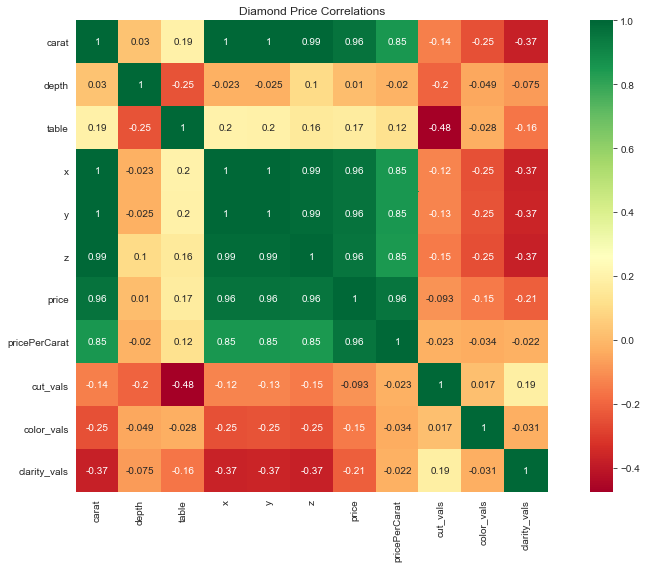

In [26]:
# Visualize these correlations

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(dcorr2, cmap='RdYlGn', annot=True, square=True, ax=ax)

ax.set_title('Diamond Price Correlations')

plt.tight_layout()
plt.show()

In [27]:
# Evaluate symmetry

diamonds_clean['symmetry_val'] = diamonds_clean['x']/diamonds_clean['y']

diamonds_clean

carat        cut color clarity  depth  table     x     y     z  price  \
0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326   
1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326   
2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327   
3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334   
4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335   
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...   
53915   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50   2757   
53916   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61   2757   
53917   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56   2757   
53918   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74   2757   
53919   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64   2757   

       pricePerCarat    carat_bins carat_cats  cut_vals  color_vals  \
0        1417.391304   (0.0, 0.49]      <0.49         5           6   
1        1552.380952   (0.0, 0.49]      <0.49         4           6   
2        1421.739130   (0.0, 0.49]      <0.49         2           6   
3        1151.724138   (0.0, 0.49]      <0.49         4           2   
4        1080.645161   (0.0, 0.49]      <0.49         2           1   
...              ...           ...        ...       ...         ...   
53915    3829.166667  (0.49, 0.99]  0.50-0.99         5           7   
53916    3829.166667  (0.49, 0.99]  0.50-0.99         2           7   
53917    3938.571429  (0.49, 0.99]  0.50-0.99         3           7   
53918    3205.813953  (0.49, 0.99]  0.50-0.99         4           3   
53919    3676.000000  (0.49, 0.99]  0.50-0.99         5           7   

       clarity_vals  symmetry_val  
0                 2      0.992462  
1                 3      1.013021  
2                 5      0.995086  
3                 4      0.992908  
4                 2      0.997701  
...             ...           ...  
53915             3      0.998264  
53916             3      0.989565  
53917             3      0.996479  
53918             2      1.004902  
53919             2      0.993186  

[53917 rows x 17 columns]

<AxesSubplot:xlabel='symmetry_val', ylabel='price'>

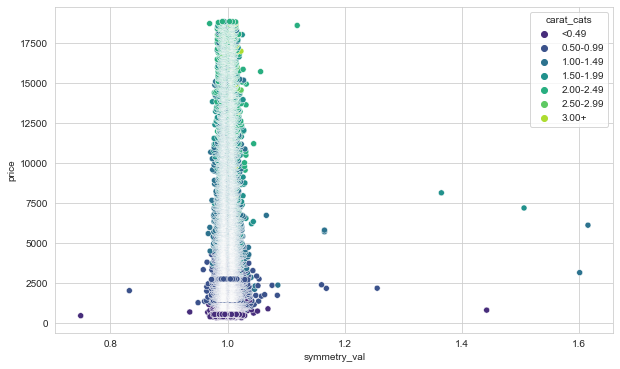

In [35]:

plt.figure(figsize=(10,6))

sns.scatterplot(x='symmetry_val', y='price', hue='carat_cats', palette='viridis', data=diamonds_clean)

In [29]:
symmetry_outliers = diamonds_clean.loc[(diamonds_clean['symmetry_val'] > 1.1) | (diamonds_clean['symmetry_val'] < 0.9)]

symmetry_outliers, symmetry_outliers.shape

(       carat      cut color clarity  depth  table     x     y     z  price  \
 2273    1.22  Premium     J     SI2   62.6   59.0  6.79  4.24  3.76   3156   
 14021   1.22    Ideal     H     SI2   61.1   57.0  6.90  5.92  4.22   5703   
 14336   1.22    Ideal     H     SI2   61.1   57.0  6.90  5.92  4.22   5807   
 15227   1.12  Premium     H     VS1   61.6   58.0  6.64  4.11  3.70   6115   
 17817   1.51     Fair     H     VS2   65.6   56.0  7.08  4.70  4.00   7188   
 19493   1.57     Fair     H     VS1   67.3   66.0  7.85  5.75  3.87   8133   
 27630   2.01     Fair     G     SI1   70.6   64.0  7.43  6.64  4.69  18574   
 33085   0.34     Good     E     VS2   57.0   61.0  6.65  4.61  2.64    816   
 34265   0.39  Premium     H     SI2   61.2   58.0  4.51  6.02  4.44    468   
 48815   0.53    Ideal     F    VVS2   62.7   56.0  5.16  6.20  3.25   2030   
 49856   0.70  Premium     H     SI1   62.0   61.0  6.65  5.69  3.46   2176   
 49896   0.70  Premium     F     SI1   62.6   55.0  

In [30]:
diamonds_clean.describe()

carat         depth         table             x             y  \
count  53917.000000  53917.000000  53917.000000  53917.000000  53917.000000   
mean       0.797687     61.749565     57.456939      5.731605      5.733428   
std        0.473777      1.432318      2.234069      1.119402      1.111272   
min        0.200000     43.000000     43.000000      3.730000      3.680000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     10.540000   

                  z         price  pricePerCarat      cut_vals    color_vals  \
count  53917.000000  53917.000000   53917.000000  53917.000000  53917.000000   
mean       3.539409   3930.910474    4007.796352      3.904223      4.405939   
std        0.691620   3987.215003    2012.211617      1.116593      1.701281   
min        1.070000    326.000000    1051.162791      1.000000      1.000000   
25%        2.910000    949.000000    2477.333333      3.000000      3.000000   
50%        3.530000   2401.000000    3494.565217      4.000000      4.000000   
75%        4.040000   5323.000000    4949.019608      5.000000      6.000000   
max        6.980000  18823.000000   17828.846154      5.000000      7.000000   

       clarity_vals  symmetry_val  
count  53917.000000  53917.000000  
mean       4.051505      0.999457  
std        1.647017      0.010455  
min        1.000000      0.749169  
25%        3.000000      0.992625  
50%        4.000000      0.995745  
75%        5.000000      1.006944  
max        8.000000      1.615572

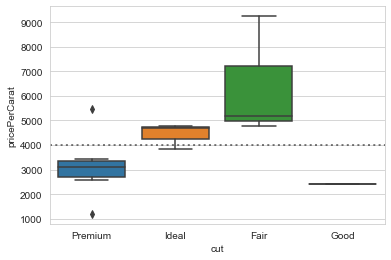

In [31]:
sns.boxplot(x='cut', y='pricePerCarat', data=symmetry_outliers)

plt.axhline(y=4000, linestyle='dotted', linewidth=2, color='k', alpha=0.5)

<AxesSubplot:xlabel='cut', ylabel='count'>

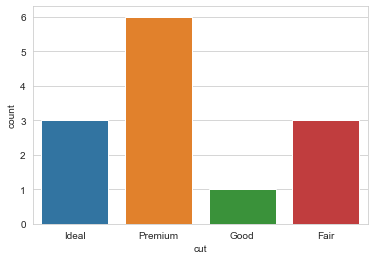

In [38]:
sns.countplot(x='cut', order=['Ideal', 'Premium','Good','Fair'], data=symmetry_outliers)

In [32]:
diamonds_clean.sample(10)

carat        cut color clarity  depth  table     x     y     z  price  \
51514   0.70      Ideal     I    VVS1   62.8   56.3  5.65  5.69  3.56   2386   
20552   1.55  Very Good     G     SI2   61.9   60.0  7.31  7.36  4.54   8873   
6847    1.00  Very Good     I     SI1   63.0   58.0  6.30  6.33  3.98   4125   
3319    0.52      Ideal     D    VVS1   62.1   54.0  5.15  5.18  3.21   3373   
19561   1.52    Premium     J    VVS2   58.3   62.0  7.61  7.49  4.40   8202   
45501   0.53      Ideal     F     VS2   62.3   55.0  5.20  5.17  3.23   1683   
42094   0.34      Ideal     F      IF   61.7   55.0  4.49  4.52  2.78   1276   
52254   0.70      Ideal     I    VVS1   61.8   56.0  5.72  5.74  3.54   2492   
42047   0.39  Very Good     G      IF   63.5   56.0  4.67  4.65  2.96   1271   
4608    0.90    Premium     E     SI2   61.3   60.0  6.17  6.23  3.80   3662   

       pricePerCarat    carat_bins carat_cats  cut_vals  color_vals  \
51514    3408.571429  (0.49, 0.99]  0.50-0.99         5           2   
20552    5724.516129  (1.49, 1.99]  1.50-1.99         3           4   
6847     4125.000000  (0.99, 1.49]  1.00-1.49         3           2   
3319     6486.538462  (0.49, 0.99]  0.50-0.99         5           7   
19561    5396.052632  (1.49, 1.99]  1.50-1.99         4           1   
45501    3175.471698  (0.49, 0.99]  0.50-0.99         5           5   
42094    3752.941176   (0.0, 0.49]      <0.49         5           5   
52254    3560.000000  (0.49, 0.99]  0.50-0.99         5           2   
42047    3258.974359   (0.0, 0.49]      <0.49         3           4   
4608     4068.888889  (0.49, 0.99]  0.50-0.99         4           6   

       clarity_vals  symmetry_val  
51514             7      0.992970  
20552             2      0.993207  
6847              3      0.995261  
3319              7      0.994208  
19561             6      1.016021  
45501             4      1.005803  
42094             8      0.993363  
52254             7      0.996516  
42047             8      1.004301  
4608              2      0.990369

### Export Files to CSV

In [33]:
# Export Clean Files

diamonds_clean.to_csv('../Data/diamonds_4preproc.csv', index=False)